In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [98]:
data=pd.read_csv("C:\\Users\\garg9\\OneDrive\\Desktop\\data science\\machine learning\\Supervised\\Logistic regression\\project2\\xAPI-Edu-Data.csv")
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [100]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [101]:
count=0
cat_col=[]
for i in data.columns:
    if data[i].dtype=='object':
        cat_col.append(i)
        count+=1
print(cat_col) 
print('Total categorical columns={}'.format(count))

['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
Total categorical columns=13


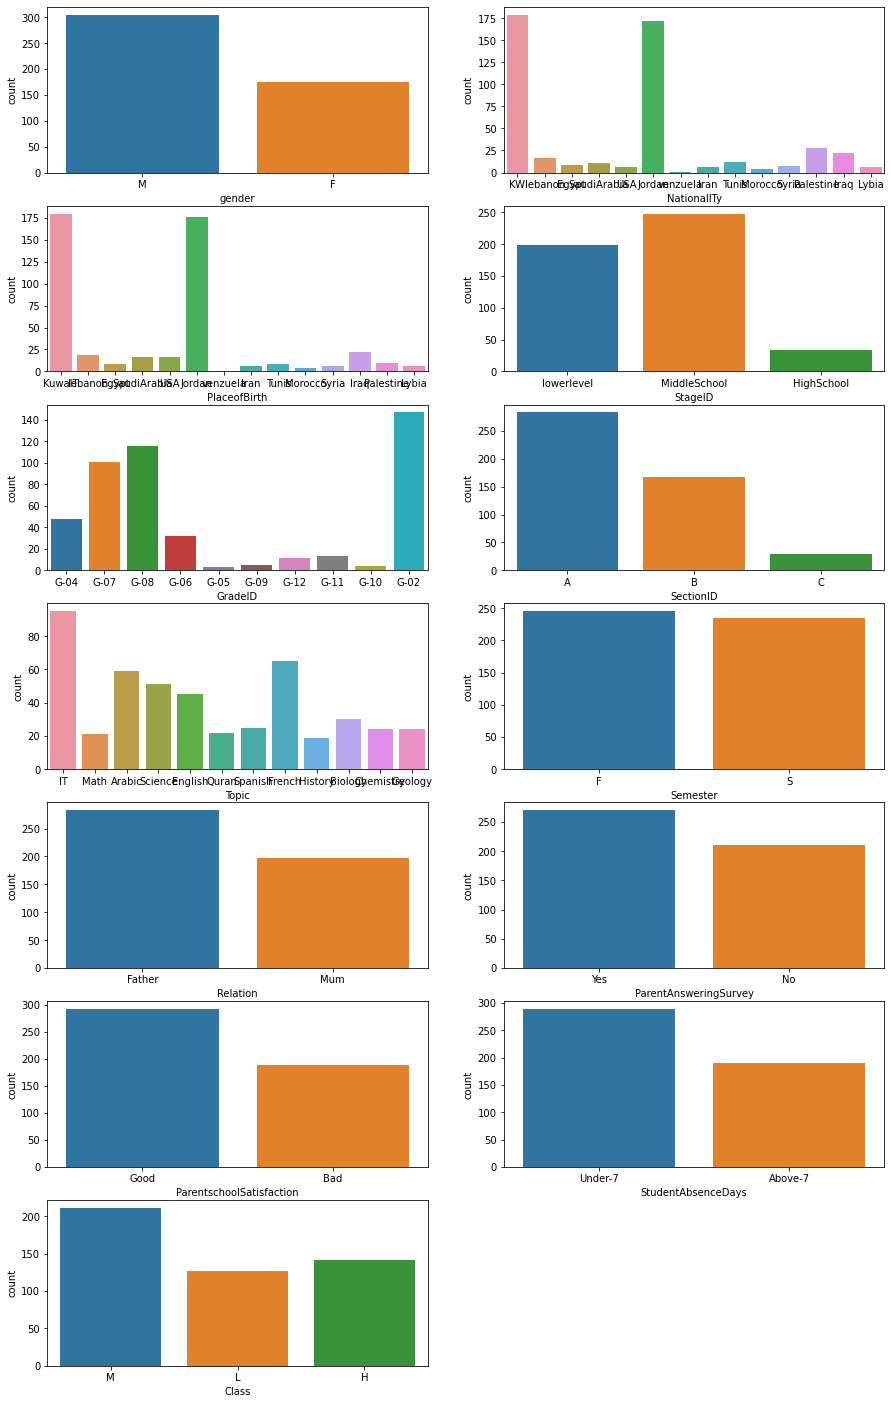

In [102]:
b=0
plt.figure(figsize=(15,25))
for i in cat_col:
    b+=1
    plt.subplot(7,2,b)
    sns.countplot(x=i,data=data)

In [103]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Class', ylabel='count'>

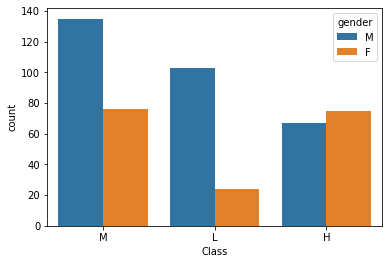

In [104]:
sns.countplot(data.Class,hue=data.gender)

<AxesSubplot:xlabel='gender', ylabel='count'>

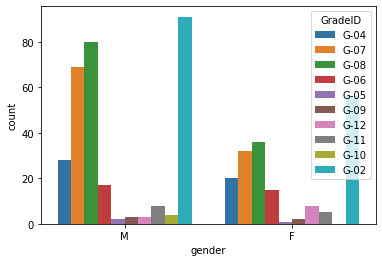

In [105]:
sns.countplot(data.gender,hue=data.GradeID)

***As u can see proportion of females is less than males but  female grades are much better than males***

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

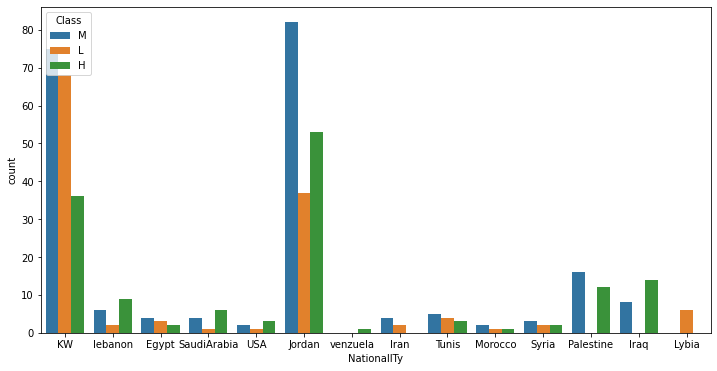

In [106]:
plt.figure(figsize=(12, 6))
sns.countplot(data.NationalITy,hue=data.Class)

It seems like students from Jordan scored much higher than any other country but we can't conclude much from this plot as proportion of students from Jordan and Kuwait is much High

<AxesSubplot:xlabel='Class', ylabel='count'>

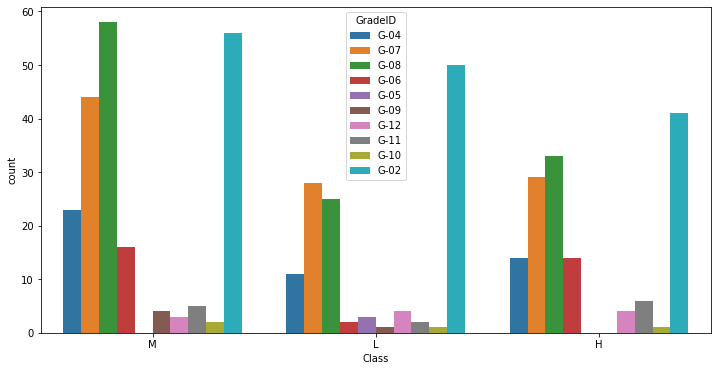

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(data.Class,hue=data.GradeID)

<AxesSubplot:xlabel='Class', ylabel='count'>

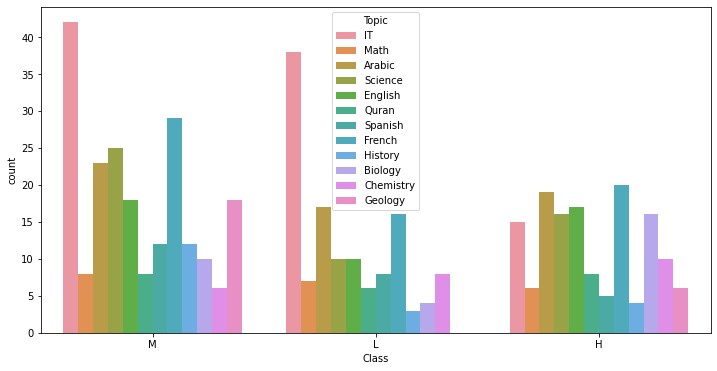

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(data.Class,hue=data.Topic)

<AxesSubplot:xlabel='Class', ylabel='count'>

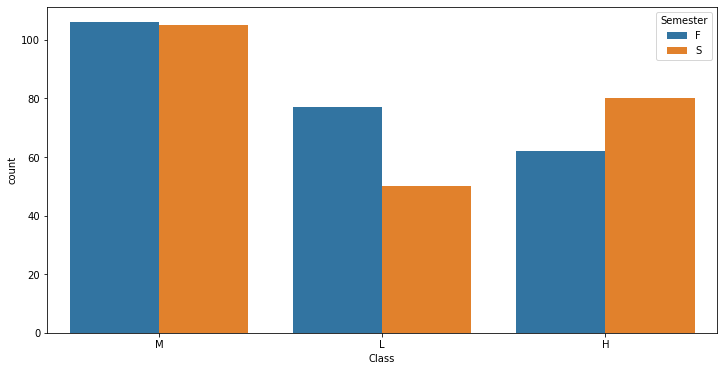

In [109]:
plt.figure(figsize=(12, 6))
sns.countplot(data.Class,hue=data.Semester)

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

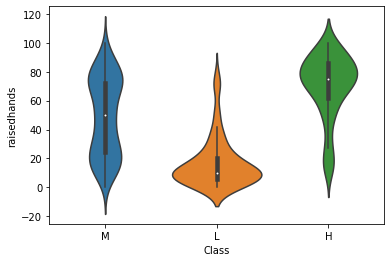

In [110]:
sns.violinplot(data.Class,data.raisedhands)

The students who raised more hands means who are more curious tends to score more as compared to other students

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

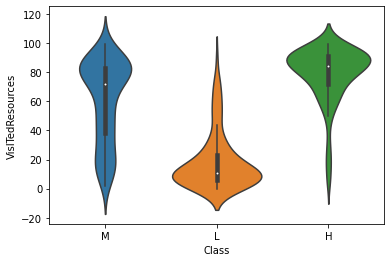

In [111]:
sns.violinplot(data.Class,data.VisITedResources)

The students who used more visited resources tends to score more as compared to other students

<AxesSubplot:xlabel='Class', ylabel='count'>

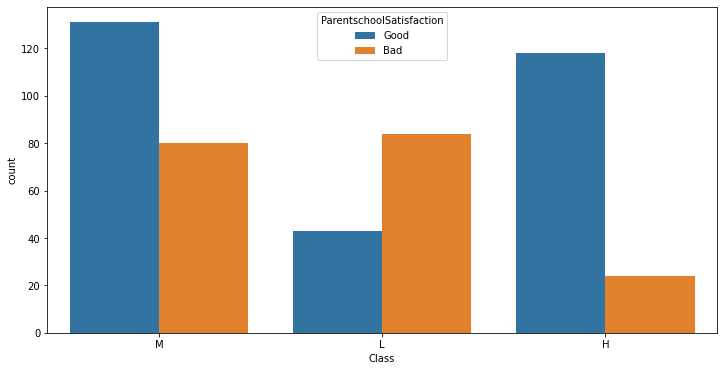

In [112]:
plt.figure(figsize=(12, 6))
sns.countplot(data.Class,hue=data.ParentschoolSatisfaction)

<AxesSubplot:xlabel='Class', ylabel='count'>

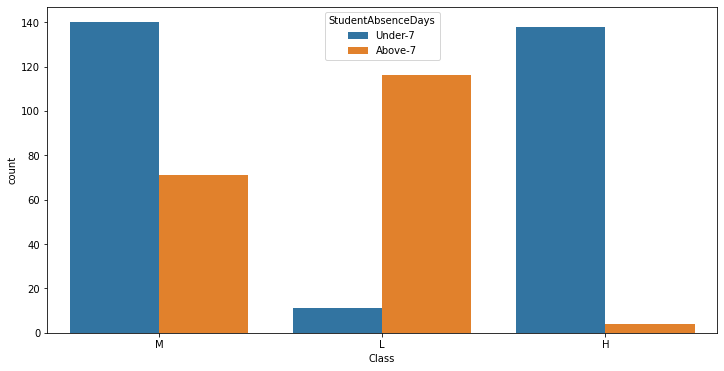

In [113]:
plt.figure(figsize=(12, 6))
sns.countplot(data.Class,hue=data.StudentAbsenceDays)

<AxesSubplot:xlabel='GradeID', ylabel='count'>

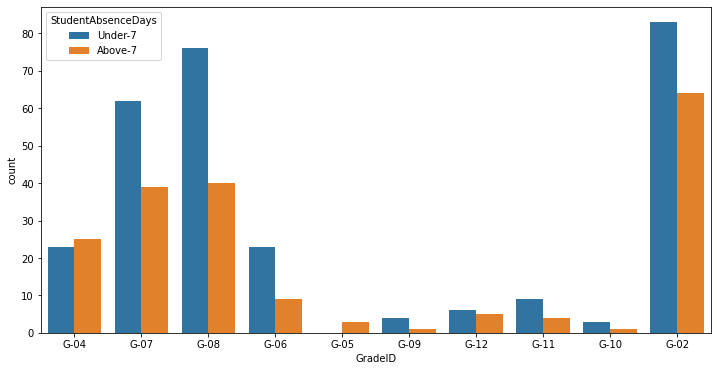

In [114]:
plt.figure(figsize=(12, 6))
sns.countplot(data.GradeID,hue=data.StudentAbsenceDays)

The Students who are less absent tends to score more as compared to students who are usually absent

From the above results we can say that raised Hands,visited resources,student absence days affects the grades of the students

In [130]:
encoder=LabelEncoder()
for i in data:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[i])

In [131]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


<AxesSubplot:>

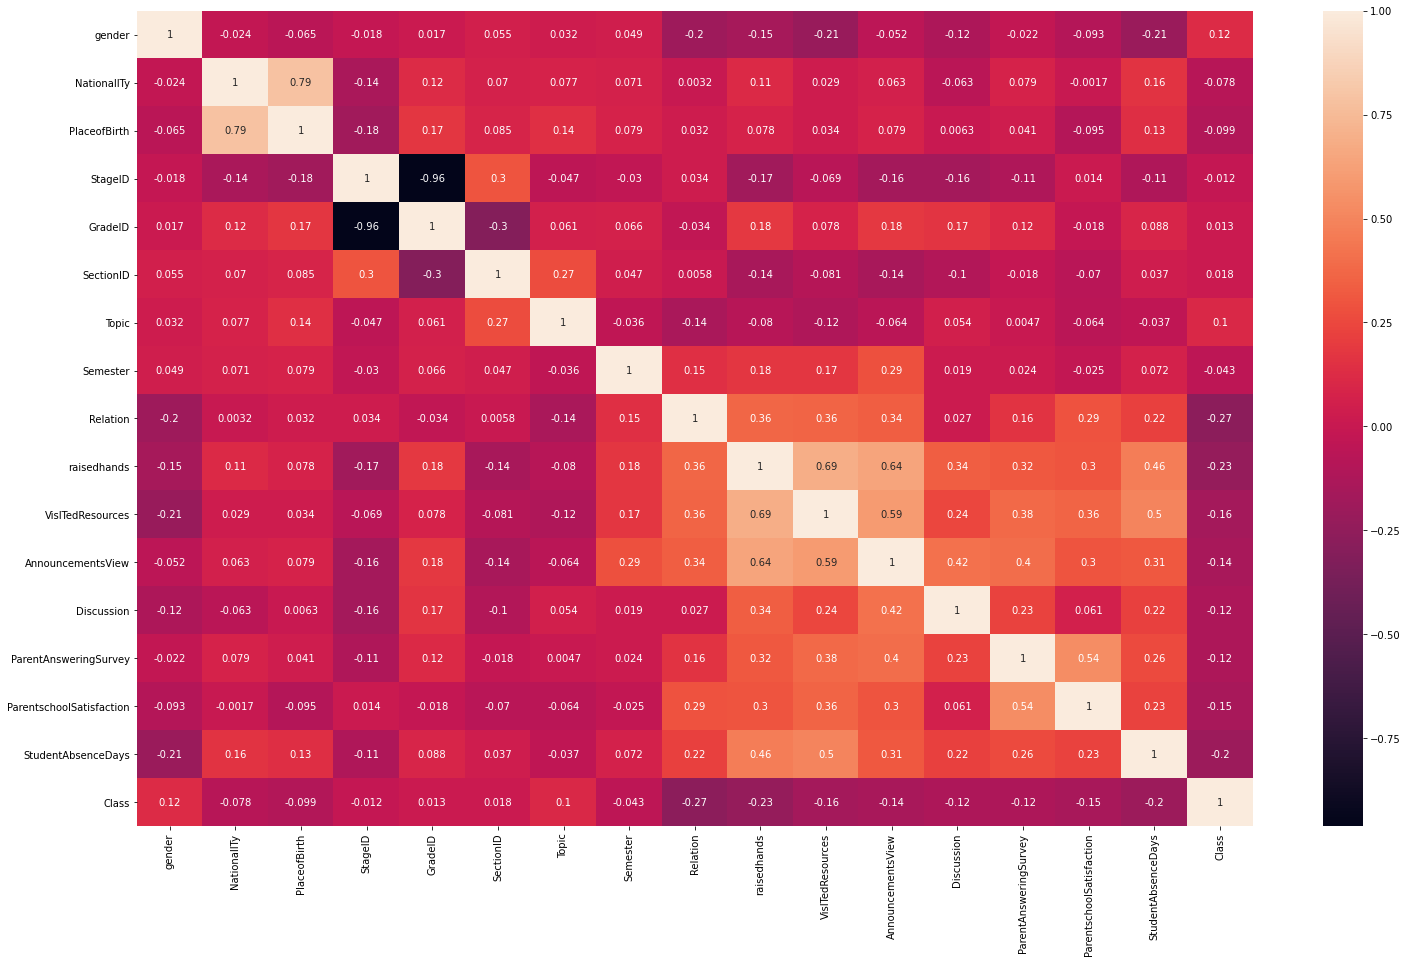

In [132]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True)

In [133]:
x=data.iloc[ : , :-1]
x

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0


In [134]:
y=data.Class
y

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int32

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)

In [152]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 16)
(120, 16)
(360,)
(120,)


In [153]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [154]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 2])

In [155]:
from sklearn import metrics
matrix_pred=metrics.confusion_matrix(y_test,y_pred)
matrix_pred

array([[18,  0, 19],
       [ 0, 29,  2],
       [11,  4, 37]], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55        37
           1       0.88      0.94      0.91        31
           2       0.64      0.71      0.67        52

    accuracy                           0.70       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.69      0.70      0.69       120

